In [1]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
#define the oscillatory function
def oscillatory_function(x, A, B, omega, phi):
    return A * np.sin(omega * x *np.pi + phi) + B

#define the oscillatory function
def poly3_function(x, a, b, c, d):
    return a*(x**3) + b*(x**2) + c*x + d

def sinusoid(x,A,f,p, b):
    return A*np.sin(.25*np.pi*f*x + p) + b

In [3]:
def minutes_to_hours(time_str):
    hours, minutes = map(int, time_str.split(':'))
    time = hours + (minutes / 60)

    return time

In [4]:
#get data from the data file
_, times, heights = np.loadtxt('ASTR19_F23_group_project_data.txt', dtype=
               [('day', 'i'), ('time', 'U5'), ('value', float)], skiprows=3, unpack=True)

#adjust times to numbers to be plotted
adjTimes = np.array([minutes_to_hours(time) for time in times])

Using the scipy library, fit the oscillatory function to the data assuming the root mean squared experimental error on the height of the tide is 0.25 ft. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Label the data, provide sufficient labeling of the axes to provide clarity, and have the notebook save the figure to a PDF

In [8]:
y_err = np.full(len(times), .25)
even = np.linspace(np.min(adjTimes), np.max(adjTimes), 1000)

# Fit the function to the data
popt, pcov = curve_fit(sinusoid, adjTimes, heights, sigma=y_err)

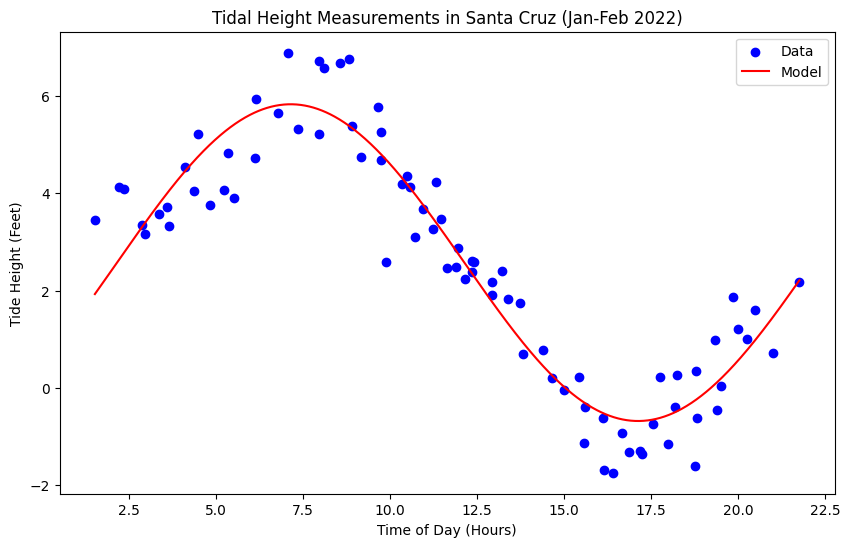

In [10]:
# Plot the data and model
plt.figure(figsize=(10, 6))
plt.scatter(adjTimes, heights, label='Data', color='blue')
plt.plot(even, sinusoid(even, *popt), label='Model', color='red')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Tide Height (Feet)')
plt.title('Tidal Height Measurements in Santa Cruz (Jan-Feb 2022)')
plt.legend()
plt.savefig('tides_model.pdf')
plt.show()

3) Next, have your notebook subtract off the best fit function from the data and plot the residuals. Assess graphically and mathematically deviations of the measured tidal data from the model. Plot a histogram of the residuals and measure the standard deviation. Is the scatter in the data larger than the assumed experimental error? Estimate the intrinsic scatter in the data after accounting for the assumed measurement error. Save the histogram as a PDF using our histogram best practices, including labeling of the data, axis labels, and "reasonable" bin widths as demonstrated in class.

In [ ]:
# sort the data by increasing x
idx_model = np.argsort(x)
x_data = x[idx_model]
y_data = y[idx_model]
y_model = sinusoid(x_data, A_fit, f_fit, p_fit)

#compute residuals
residuals = y_data - y_model